<a href="https://colab.research.google.com/github/femyelizabeth/myfirst/blob/main/houing_price_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
house=pd.read_csv("/content/Housing.csv")

In [3]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
def toNumeric(x):
    return x.map({"no":0,"yes":1})
def convert_binary():
    for column in list(house.select_dtypes(['object']).columns):
        if(column != 'furnishingstatus'):
            house[[column]] = house[[column]].apply(toNumeric)
convert_binary()


In [8]:
status = pd.get_dummies(house['furnishingstatus'])
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [10]:
status = pd.get_dummies(house['furnishingstatus'], drop_first=True)


In [11]:
house = pd.concat([house, status], axis=1)

In [12]:
house.drop(columns='furnishingstatus',inplace=True)

In [13]:
Y = house.price
# includes the fields other than prices
X = house.iloc[:,1:]

In [14]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
def preprocessing(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [15]:
preprocessing(X)


         VIF         Features
0   4.642181             area
1   7.548951         bedrooms
2   1.685519        bathrooms
3   2.748302          stories
4   5.912370         mainroad
5   1.475439        guestroom
6   2.013754         basement
7   1.089327  hotwaterheating
8   1.762761  airconditioning
9   2.000022          parking
10  1.497539         prefarea
11  2.244298   semi-furnished
12  1.874527      unfurnished


In [16]:
X.drop(['area','bedrooms'], axis=1, inplace=True)
preprocessing(X)

         VIF         Features
0   1.591949        bathrooms
1   2.323144          stories
2   4.480333         mainroad
3   1.464301        guestroom
4   1.896633         basement
5   1.086156  hotwaterheating
6   1.720275  airconditioning
7   1.823778          parking
8   1.460957         prefarea
9   1.975297   semi-furnished
10  1.627909      unfurnished


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [19]:
y_predict = regression.predict(x_test)

In [21]:
# Data visualization
from matplotlib import pyplot as plot


Text(0, 0.5, 'y_pred')

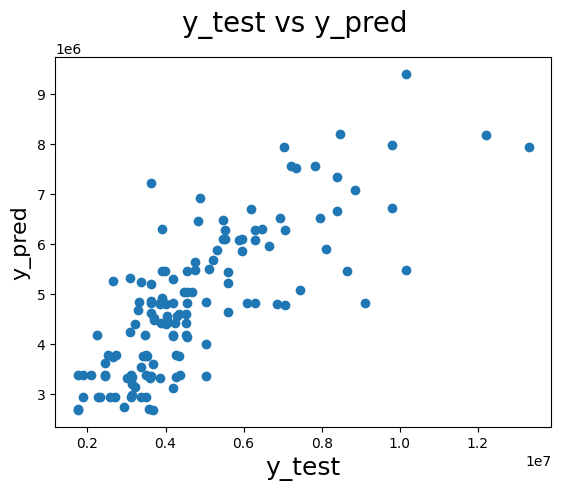

In [23]:
plot.scatter(y_test,y_predict)
plot.suptitle('y_test vs y_pred', fontsize=20)
plot.xlabel('y_test', fontsize=18)
plot.ylabel('y_pred', fontsize=16)